# Imports

In [ ]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Agency ID (getter)

In [9]:
def get_agency_code(agency_name):
    """
    Retrieve the agency code for a given agency name using the USA Spending API.

    Parameters:
    - agency_name (str): The name of the agency for which the code is to be retrieved.

    Returns:
    - str: A message containing the agency name and its corresponding code if found.
           If the agency is not found, a message indicating that is returned.
           If there's an issue with the API request, an error message with the status code is returned.
    """
    api_url = "https://api.usaspending.gov/api/v2/references/toptier_agencies/"
    response = requests.get(api_url)

    if response.status_code == 200:
        data = response.json()

        # parse data to find agency ID
        for agency in data['results']:
            if agency['agency_name'] == agency_name:
                agency_id = agency['toptier_code']
                return f"{agency_name} Agency ID: {agency_id}"
        return f"Agency '{agency_name}' not found."

    else:
        return f"Failed to retrieve data. Status code: {response.status_code}"

# Main
agency_name = input("Enter a toptier agency name: ")
result = get_agency_code(agency_name)
print(result)

Department of Defense Agency ID: 097


# Toptier-Agency Budgect and Spending


Fiscal Year 2024:

Agency Budgetary Resources: N/A
Agency Total Obligated: N/A

Fiscal Year 2023:

Agency Budgetary Resources: $1,523,433,316,840.06
Agency Total Obligated: $1,330,544,104,855.49

Fiscal Year 2022:

Agency Budgetary Resources: $1,635,073,184,398.36
Agency Total Obligated: $1,189,944,864,054.66

Fiscal Year 2021:

Agency Budgetary Resources: $1,514,296,053,257.55
Agency Total Obligated: $1,146,962,263,260.70

Fiscal Year 2020:

Agency Budgetary Resources: $1,278,882,283,176.59
Agency Total Obligated: $1,130,135,336,028.02

Fiscal Year 2019:

Agency Budgetary Resources: $1,252,639,175,378.39
Agency Total Obligated: $1,154,860,031,199.99

Fiscal Year 2018:

Agency Budgetary Resources: $1,261,940,994,955.88
Agency Total Obligated: $1,092,438,524,753.46

Fiscal Year 2017:

Agency Budgetary Resources: $1,163,404,425,401.68
Agency Total Obligated: $1,014,206,206,108.00


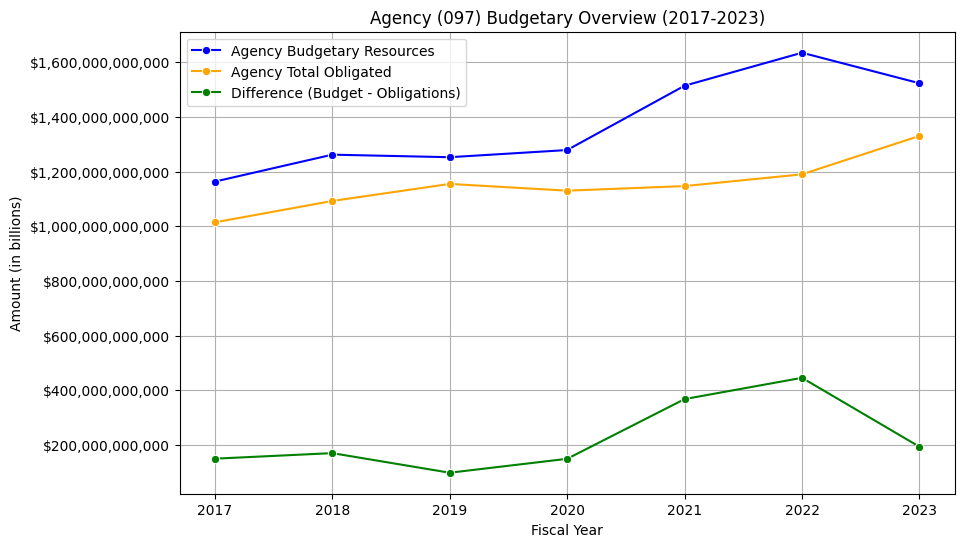

In [14]:
def get_agency_resources(toptier_code):
    """
    Retrieve budgetary resources information for an agency using the USA Spending API.

    Parameters:
    - toptier_code (str): The toptier code of the agency for which budgetary resources are to be retrieved.

    Returns:
    - dict or None: A dictionary containing budgetary resources information if the request is successful.
                   If there's an issue with the API request, an error message is printed, and None is returned.
    """
    url = f"https://api.usaspending.gov/api/v2/agency/{toptier_code}/budgetary_resources/"
    
    response = requests.get(url)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None

def plot_and_print_agency_resources(data):
    """
    Plot and print agency budgetary resources and total obligated values over fiscal years.

    Parameters:
    - data (dict): A dictionary containing agency budgetary resources and total obligated values over fiscal years.

    Returns:
    - None: Plots a line graph and prints the budgetary resources and total obligated values for each fiscal year.
    """
    # Extracting fiscal years 
    fiscal_years = [entry['fiscal_year'] for entry in data['agency_data_by_year']]

    # Extracting budgetary resources for each fiscal year, with a default value of None if not present
    budgetary_resources = [entry.get('agency_budgetary_resources', None) for entry in data['agency_data_by_year']]

    # Extracting total obligated values for each fiscal year, with a default value of None if not present
    total_obligated = [entry.get('agency_total_obligated', None) for entry in data['agency_data_by_year']]

    # Calculating the difference between budget and obligated values if both are not None, otherwise, set to None
    difference = [budget - obligated if budget is not None and obligated is not None else None for budget, obligated in zip(budgetary_resources, total_obligated)]

    # Printing budgetary resources and total obligated values for each fiscal year
    for entry in data['agency_data_by_year']:
        year = entry['fiscal_year']
        budgetary_resource = entry.get('agency_budgetary_resources', None)
        total_obligated_value = entry.get('agency_total_obligated', None)

        print(f"\nFiscal Year {year}:\n")
        print(f"Agency Budgetary Resources: ${budgetary_resource:,.2f}" if budgetary_resource is not None else "Agency Budgetary Resources: N/A")
        print(f"Agency Total Obligated: ${total_obligated_value:,.2f}" if total_obligated_value is not None else "Agency Total Obligated: N/A")

    plt.figure(figsize=(10, 6))
    
    sns.lineplot(x=fiscal_years, y=budgetary_resources, marker='o', label='Agency Budgetary Resources', color='blue')
    sns.lineplot(x=fiscal_years, y=total_obligated, marker='o', label='Agency Total Obligated', color='orange')
    sns.lineplot(x=fiscal_years, y=difference, marker='o', label='Difference (Budget - Obligations)', color='green')

    plt.title(f'Agency ({toptier_code}) Budgetary Overview (2017-2023)')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Amount (in billions)')
    plt.legend()
    plt.ticklabel_format(style='plain', axis='y', useOffset=False)
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
    plt.grid(True)
    plt.show()

# Main
toptier_code = input("Enter a toptier-agency code: ")
agency_resources_data = get_agency_resources(toptier_code)

if agency_resources_data:
    plot_and_print_agency_resources(agency_resources_data)
else:
    print("Failed to retrieve agency resources.")


# Total Obligations for Subagencies #

Fiscal Year: 2017, Total Obligations (Washington Headquarters Services): 1596625408.31
Fiscal Year: 2018, Total Obligations (Washington Headquarters Services): 1671574001.19
Fiscal Year: 2019, Total Obligations (Washington Headquarters Services): 2135619737.66
Fiscal Year: 2020, Total Obligations (Washington Headquarters Services): 2545380841.73
Fiscal Year: 2021, Total Obligations (Washington Headquarters Services): 2569704017.66
Fiscal Year: 2022, Total Obligations (Washington Headquarters Services): 2557838190.03
Fiscal Year: 2023, Total Obligations (Washington Headquarters Services): 2852919444.33


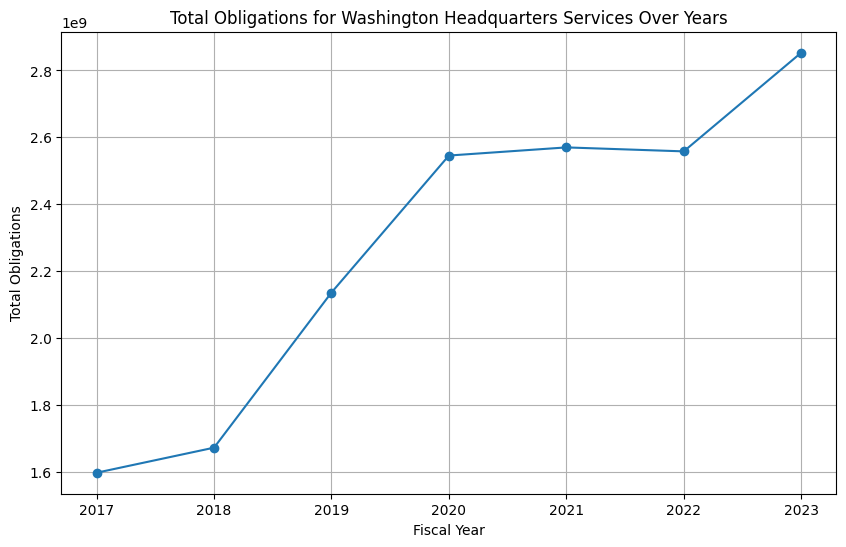

In [13]:
def get_subagency_federal_accounts(toptier_code, fiscal_year=None, agency_type="awarding", order="desc", sort="total_obligations", page=1, limit=10):
    """
    Retrieve federal account information for sub-agencies of a specific agency using the USA Spending API.

    Parameters:
    - toptier_code (str): The toptier code of the agency for which sub-agency federal accounts are to be retrieved.
    - fiscal_year (int, optional): The fiscal year for which data is to be retrieved. Default is None.
    - agency_type (str, optional): The agency type, specifying whether the agency is awarding or funding. Default is "awarding".
    - order (str, optional): The order in which results should be sorted, either "asc" (ascending) or "desc" (descending). Default is "desc".
    - sort (str, optional): The field by which results should be sorted, e.g., "total_obligations". Default is "total_obligations".
    - page (int, optional): The page number of the results. Default is 1.
    - limit (int, optional): The number of results to be returned per page. Default is 10.

    Returns:
    - dict or None: A dictionary containing federal account information for sub-agencies if the request is successful.
                   If there's an issue with the API request, an error message is printed, and None is returned.
    """
    url = f"https://api.usaspending.gov/api/v2/agency/{toptier_code}/sub_agency/"
    
    params = {
        "fiscal_year": fiscal_year,
        "agency_type": agency_type,
        "order": order,
        "sort": sort,
        "page": page,
        "limit": limit
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None

def find_total_obligations(subagency_data, subagency_name):
    """
    Find the total obligations of a specific sub-agency.

    Parameters:
    - subagency_data (dict): A dictionary containing information about sub-agencies, typically obtained from an API response.
    - subagency_name (str): The name of the sub-agency for which the total obligations are to be retrieved.

    Returns:
    - float or None: The total obligations of the specified sub-agency if found. Returns None if the sub-agency is not present or if data is not available.
    """
    for result in subagency_data.get("results", []):
        if result.get("name") == subagency_name:
            return result.get("total_obligations")
    return None

def plot_total_obligations(toptier_code, subagency_name):
    """
    Retrieve and plot the total obligations of a specific sub-agency over fiscal years using the USA Spending API.

    Parameters:
    - toptier_code (str): The toptier code of the agency for which sub-agency federal accounts are to be retrieved.
    - subagency_name (str): The name of the sub-agency for which total obligations are to be plotted.

    Returns:
    - None: Plots a line graph depicting the total obligations of the specified sub-agency over fiscal years.
    """
    fiscal_years = []
    total_obligations_list = []

    for year in range(2017, 2024):
        subagency_federal_accounts_data = get_subagency_federal_accounts(toptier_code, fiscal_year=year)
        
        # Access fiscal year
        fiscal_year = subagency_federal_accounts_data.get("fiscal_year")
        if fiscal_year is not None:
            # Find total_obligations for the specified sub-agency
            total_obligations = find_total_obligations(subagency_federal_accounts_data, subagency_name)
            
            # Append values to lists for plotting
            fiscal_years.append(fiscal_year)
            total_obligations_list.append(total_obligations)
            
            print(f"Fiscal Year: {fiscal_year}, Total Obligations ({subagency_name}): {total_obligations}")
        else:
            print(f"Fiscal Year not found for {year} in the response.")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(fiscal_years, total_obligations_list, marker='o')
    plt.title(f'Total Obligations for {subagency_name} Over Years')
    plt.xlabel('Fiscal Year')
    plt.ylabel('Total Obligations')
    plt.grid(True)
    plt.show()

# Main 
toptier_code = input("Enter a toptier-agency code: ")
subagency_name = input("Enter the sub-agency name: ")

plot_total_obligations(toptier_code, subagency_name)

# financial_balances()

Fiscal Year 2017:
Budget Authority Amount: $220,459,743,630.97
Obligated Amount: $163,075,192,516.58
Outlay Amount: $156,574,733,852.50

Fiscal Year 2018:
Budget Authority Amount: $224,372,520,297.27
Obligated Amount: $157,671,655,471.61
Outlay Amount: $157,949,746,427.49

Fiscal Year 2019:
Budget Authority Amount: $242,451,803,717.47
Obligated Amount: $170,898,908,395.86
Outlay Amount: $167,254,596,200.59

Fiscal Year 2020:
Budget Authority Amount: $322,370,908,923.19
Obligated Amount: $239,791,172,810.38
Outlay Amount: $204,224,784,766.71

Fiscal Year 2021:
Budget Authority Amount: $392,371,979,973.22
Obligated Amount: $277,306,542,292.14
Outlay Amount: $255,908,949,949.30

Fiscal Year 2022:
Budget Authority Amount: $431,862,412,285.90
Obligated Amount: $276,349,737,150.23
Outlay Amount: $268,529,379,297.85

Fiscal Year 2023:
Budget Authority Amount: $475,155,999,521.89
Obligated Amount: $297,765,940,886.84
Outlay Amount: $250,278,358,725.95



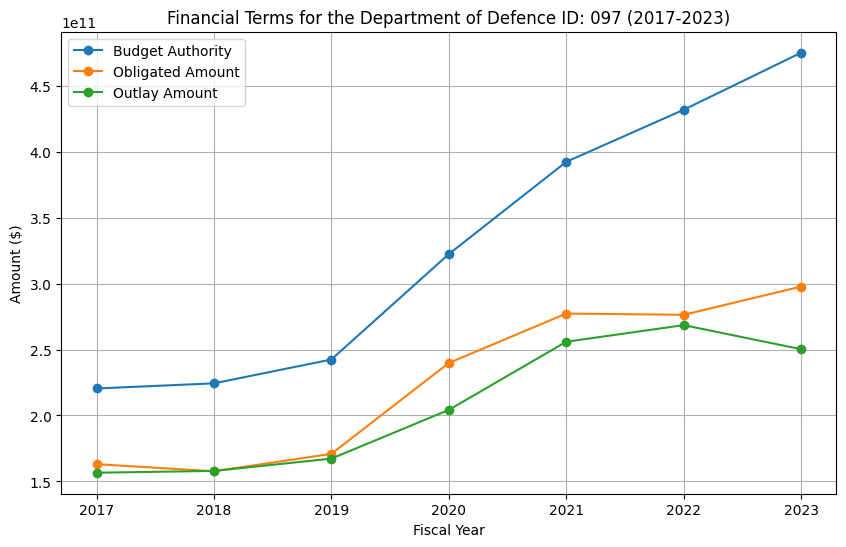

In [5]:
def financial_balances():
    """
    Retrieve financial balance data for a specific funding agency over a range of fiscal years and plot the results.

    The function queries the USA Spending API for financial balance information, including Budget Authority Amount,
    Obligated Amount, and Outlay Amount, for a specified funding agency over a range of fiscal years.

    Note: If the outputs of this function are not as expected, the function might need to be adapted based on the API response format.
          More exploration of the API response format may be required.

    Returns:
    - tuple: A tuple containing lists of years, budget authority values, obligated amount values, and outlay amount values.
    """
    years = []
    budget_authority_values = []
    obligated_amount_values = []
    outlay_amount_values = []
    api_url = "https://api.usaspending.gov/api/v2/financial_balances/agencies/"

    for fiscal_year in range(start_year, end_year + 1):
        params = {
            "fiscal_year": fiscal_year,
            "funding_agency_id": funding_agency_id
        }

        try:
            response = requests.get(api_url, params=params)
            response.raise_for_status()
            data = response.json()

            budget_authority = float(data['results'][0]['budget_authority_amount'])
            obligated_amount = float(data['results'][0]['obligated_amount'])
            outlay_amount = float(data['results'][0]['outlay_amount'])

            years.append(fiscal_year)
            budget_authority_values.append(budget_authority)
            obligated_amount_values.append(obligated_amount)
            outlay_amount_values.append(outlay_amount)

            print(f"Fiscal Year {fiscal_year}:\n"
                  f"Budget Authority Amount: ${budget_authority:,.2f}\n"
                  f"Obligated Amount: ${obligated_amount:,.2f}\n"
                  f"Outlay Amount: ${outlay_amount:,.2f}\n")

        except requests.exceptions.RequestException as e:
            print(f"Request failed for fiscal year {fiscal_year}: {e}")
        except (KeyError, IndexError):
            print(f"Data format error for fiscal year {fiscal_year}: Check the API response format.")
    return years, budget_authority_values, obligated_amount_values, outlay_amount_values

# Main
funding_agency_id = '097'
start_year = 2017 # endpoint range of fiscal years is limited to (2017 - current year)
end_year = 2023 

years, budget_authority_values, obligated_amount_values, outlay_amount_values = financial_balances()
plt.figure(figsize=(10, 6))
plt.plot(years, budget_authority_values, marker='o', linestyle='-', label='Budget Authority')
plt.plot(years, obligated_amount_values, marker='o', linestyle='-', label='Obligated Amount')
plt.plot(years, outlay_amount_values, marker='o', linestyle='-', label='Outlay Amount')
plt.title(f"Financial Terms for the Department of Defence ID: {funding_agency_id} (2017-2023)")
plt.xlabel("Fiscal Year")
plt.ylabel("Amount ($)")
plt.legend()
plt.grid(True)
plt.show()